<a href="https://colab.research.google.com/github/trighpro123/Nhandienbanthan/blob/main/NhanDienBanThan_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [ ]:
data_root='/content/drive/My Drive/File_anh_ANN'

In [ ]:
IMAGE_SHAPE = (150, 150)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/My Drive/File_anh_ANN
Found 23 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)
print(train_generator.class_indices)

Image batch shape:  (32, 150, 150, 3)
Label batch shape:  (32, 2)
['Ko_Phai_Tri' 'Tri']
{'Ko_phai_Tri': 0, 'Tri': 1}


Epoch 1/20
3/3 [==============================] - 2s 347ms/step - loss: 22.0357 - accuracy: 0.4624 - val_loss: 19.2850 - val_accuracy: 0.4783
Epoch 2/20
3/3 [==============================] - 1s 275ms/step - loss: 21.7228 - accuracy: 0.4624 - val_loss: 7.6383 - val_accuracy: 0.5217
Epoch 3/20
3/3 [==============================] - 1s 250ms/step - loss: 13.7255 - accuracy: 0.4409 - val_loss: 2.6870 - val_accuracy: 0.4783
Epoch 4/20
3/3 [==============================] - 1s 242ms/step - loss: 9.9988 - accuracy: 0.5161 - val_loss: 9.5868 - val_accuracy: 0.5217
Epoch 5/20
3/3 [==============================] - 1s 247ms/step - loss: 4.5430 - accuracy: 0.5054 - val_loss: 0.1034 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 1s 248ms/step - loss: 0.4468 - accuracy: 0.8387 - val_loss: 2.6715 - val_accuracy: 0.4783
Epoch 7/20
3/3 [==============================] - 1s 254ms/step - loss: 0.4815 - accuracy: 0.8925 - val_loss: 1.8358 - val_accuracy: 0.5217
Epoch 8/20
3/3 [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


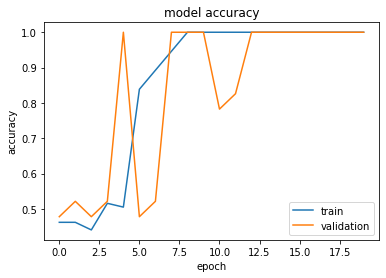

In [ ]:

model=Sequential()

# #Tạo neurel model
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform',input_shape=(150,150,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
# model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history=model.fit(train_generator,epochs=20,batch_size=2,validation_data=valid_generator,verbose=1)

# # Vẽ đồ thị bằng plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

Khong phai Tri


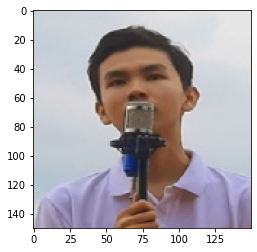

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np
# Load model lên sử dụng
# model500=models.load_model('CNN_Final.h5')
#Cóc
img=image.load_img('Thien.JPG',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Khong phai Tri")
else:
  print("Tri")


Khong phai Tri


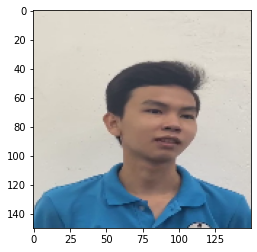

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np


img=image.load_img('Thien_50.bmp',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Khong phai Tri")
else:
  print("Tri")

Khong phai Tri


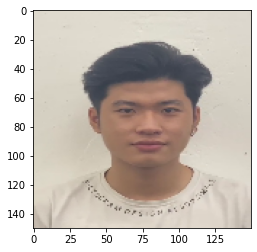

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np


img=image.load_img('Long_54.bmp',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Khong phai Tri")
else:
  print("Tri")

Tri


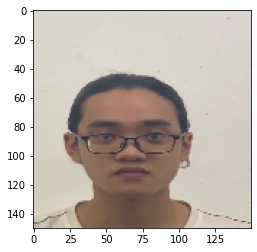

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np


img=image.load_img('Tri_49.bmp',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Khong phai Tri")
else:
  print("Tri")